# Pengenalan Pola Dengan Support vector machines (SVM)


# 0. Data path

In [30]:
path_referensi = ('/content/drive/MyDrive/Pengenalan Pola/DS-5/')

# 1. Load Dataset Referensi

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import os

file_referensi = os.listdir(path_referensi)
print(file_referensi)

#jumlah data
jumlah_data = len(file_referensi)
print(f"Jumlah file/data: {jumlah_data}")

['8_C_5271011009001_3_8.jpg', '8_C_5272031005011_2_8.jpg', '8_C_5302082010001_2_8.jpg', '8_C_5208042011002_3_8.jpg', '8_C_5303032007003_3_8.jpg', '8_C_5303072003001_3_8.jpg', '8_C_5302082001003_3_88.jpg', '8_C_5271011010007_1_8.jpg', '8_C_5301252001005_2_8.jpg', '8_C_5271011004009_2_8.jpg', '8_C_5301092007001_3_8.jpg', '8_C_5302142003002_3_8.jpg', '8_C_5301202001002_3_8.jpg', '8_C_5301202002001_3_8.jpg', '8_C_5301122005003_2_8.jpg', '8_C_5272031004004_2_8.jpg', '8_C_5302082012001_3_88.jpg', '8_C_5301112009003_2_8.jpg', '8_C_5303032003001_2_8.jpg', '8_C_5271011007001_3_8.jpg', '8_C_5303072001005_3_8.jpg', '8_C_5303072005004_2_8.jpg', '8_C_5302082010002_2_8.jpg', '8_C_5208042012006_2_8.jpg', '8_C_5208042011004_2_8.jpg', '8_C_5272031004006_3_8.jpg', '8_C_5272031004002_1_8.jpg', '8_C_5302092001001_3_8.jpg', '8_C_5272031006006_3_8.jpg', '8_C_5271011004008_1_8.jpg', '8_C_5272031001009_2_8.jpg', '8_C_5272031001001_1_8.jpg', '8_C_5301252007001_3_8.jpg', '8_C_5272031003009_3_8.jpg', '8_C_530110

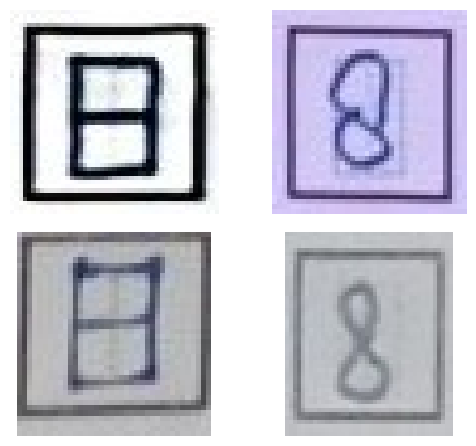

In [33]:
from matplotlib import pyplot as plt

# Sample file referensi
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(plt.imread(path_referensi + file_referensi[i]))
  plt.tight_layout()
  plt.axis('off')

# Preprocessing Data

In [34]:
# Inisialisasi kelas
kelas = {i: {} for i in range(10)}

# Proses nama file untuk menentukan kelas berdasarkan nama file
for file in file_referensi:
    angka_pertama = int(file.split('_')[0])
    kelas[angka_pertama][file] = file

# Cetak hasil pengelompokan
print("File dikelompokkan berdasarkan angka pertama:")
for angka in kelas:
    print(f"Kelas {angka}: {kelas[angka]}")


File dikelompokkan berdasarkan angka pertama:
Kelas 0: {'0_C_5310152006003_1_00.jpg': '0_C_5310152006003_1_00.jpg', '0_C_5311022003006_2_0.jpg': '0_C_5311022003006_2_0.jpg', '0_C_5311142001004_3_0.jpg': '0_C_5311142001004_3_0.jpg', '0_C_5311142003002_1_0.jpg': '0_C_5311142003002_1_0.jpg', '0_C_5311142004001_2_0.jpg': '0_C_5311142004001_2_0.jpg', '0_C_5311022003006_1_00.jpg': '0_C_5311022003006_1_00.jpg', '0_C_5311022003001_1_0.jpg': '0_C_5311022003001_1_0.jpg', '0_C_5311022009002_3_0.jpg': '0_C_5311022009002_3_0.jpg', '0_C_5311142006001_3_0.jpg': '0_C_5311142006001_3_0.jpg', '0_C_5310152009003_1_0.jpg': '0_C_5310152009003_1_0.jpg', '0_C_5311022003002_1_00.jpg': '0_C_5311022003002_1_00.jpg', '0_C_5311022007001_1_0.jpg': '0_C_5311022007001_1_0.jpg', '0_C_5311142007002_1_00.jpg': '0_C_5311142007002_1_00.jpg', '0_C_5310152006003_1_000.jpg': '0_C_5310152006003_1_000.jpg', '0_C_5311142001003_1_0.jpg': '0_C_5311142001003_1_0.jpg', '0_C_5311142007002_2_0.jpg': '0_C_5311142007002_2_0.jpg', '0_C

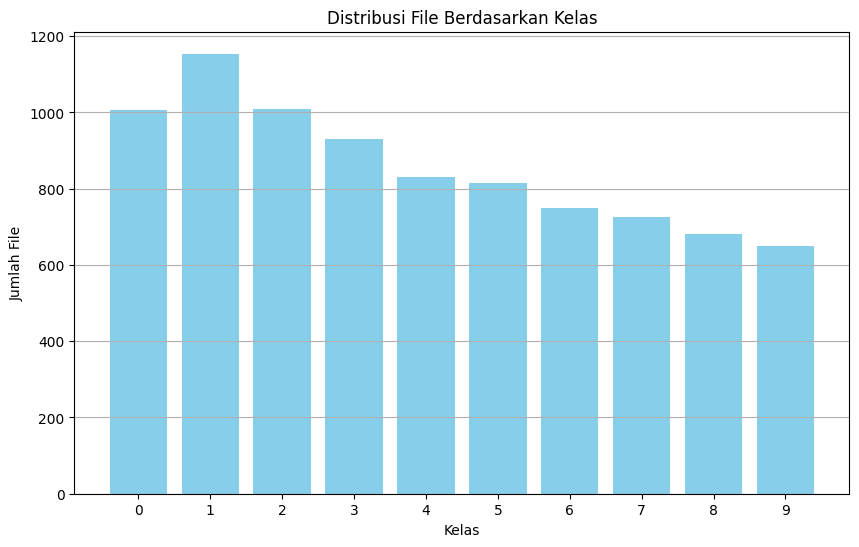

In [35]:
import matplotlib.pyplot as plt

# Data jumlah file di setiap kelas
jumlah_files_per_kelas = {k: len(v) for k, v in kelas.items()}

# Data untuk plotting
kelas_numerik = list(jumlah_files_per_kelas.keys())
jumlah_files = list(jumlah_files_per_kelas.values())

# Plot
plt.figure(figsize=(10, 6))
plt.bar(kelas_numerik, jumlah_files, color='skyblue')
plt.xlabel('Kelas')
plt.ylabel('Jumlah File')
plt.title('Distribusi File Berdasarkan Kelas')
plt.xticks(kelas_numerik)
plt.grid(axis='y')

# Tampilkan plot
plt.show()

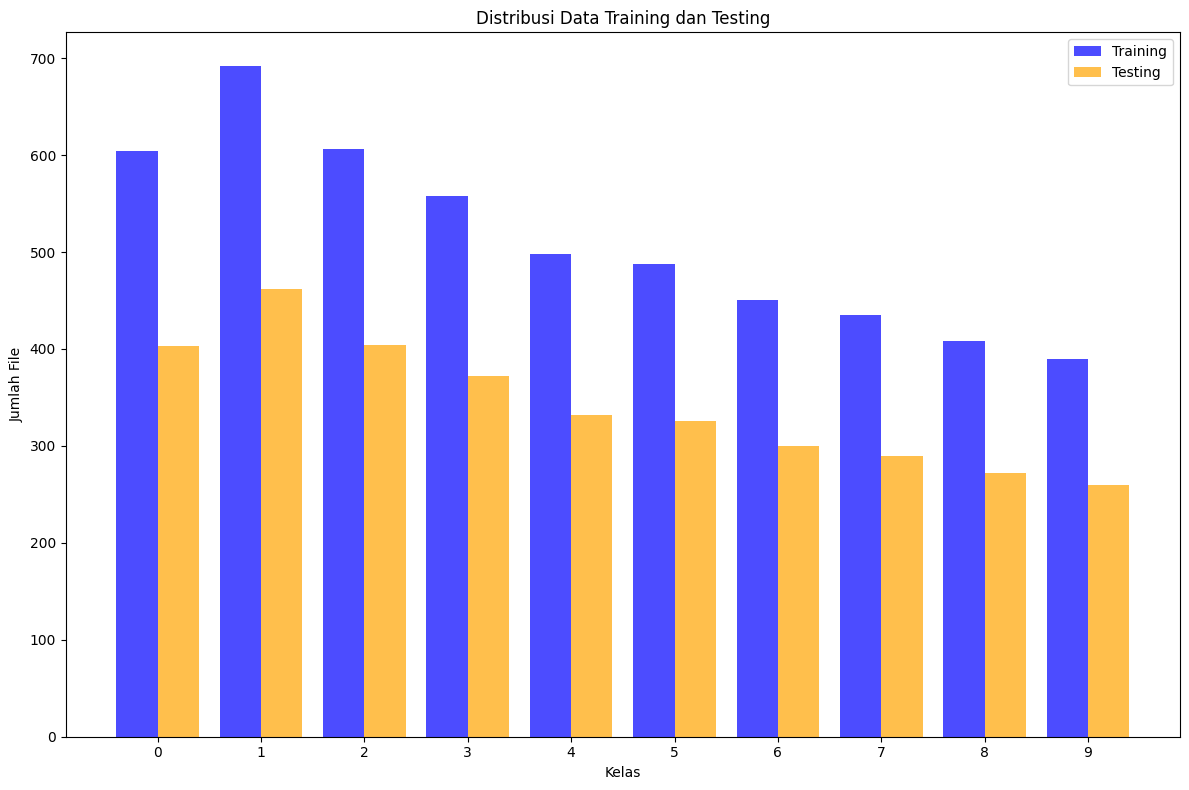

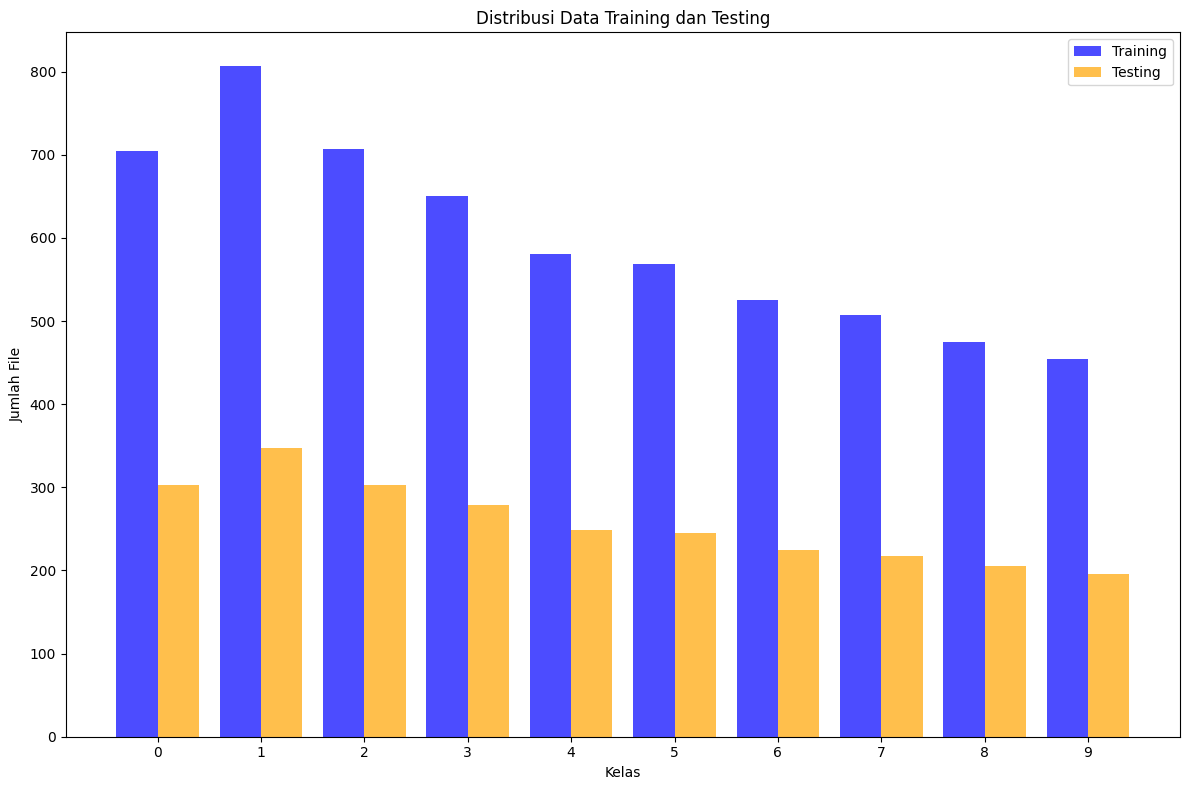

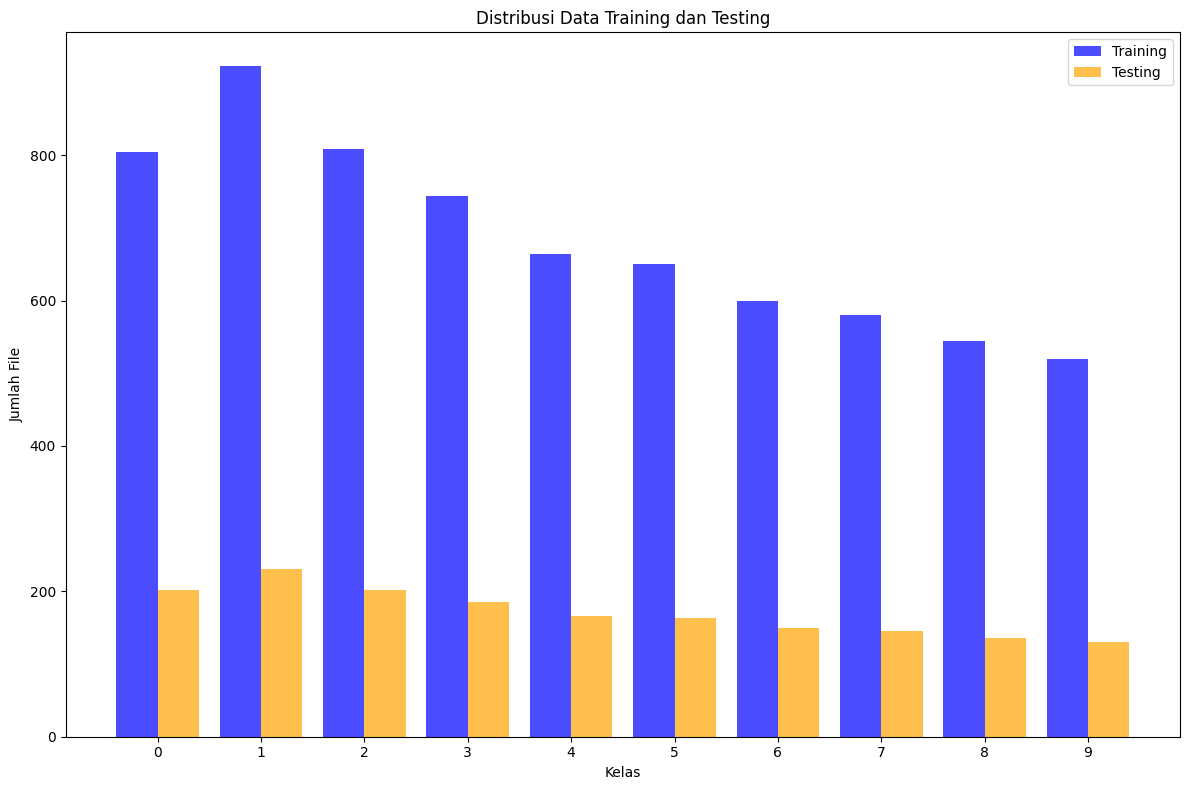

In [36]:
import matplotlib.pyplot as plt
import random

split = [0.6,0.7,0.8]
for s in split:
  # Proses pembagian data: 70% untuk training dan 30% untuk test
  train_data = {k: {'train': [], 'test': []} for k in kelas}
  for k, files in kelas.items():
      file_list = list(files)
      random.shuffle(file_list)  # Mengacak data agar tidak berurut
      split_idx = int(s * len(file_list))
      train_data[k]['train'] = file_list[:split_idx]
      train_data[k]['test'] = file_list[split_idx:]

  # Menampilkan distribusi data
  train_counts = {k: len(v['train']) for k, v in train_data.items()}
  test_counts = {k: len(v['test']) for k, v in train_data.items()}

  # Plot distribusi data training dan testing
  plt.figure(figsize=(12, 8))
  bar_width = 0.4  # Lebar bar untuk membedakan antara training dan testing

  # Plot data training
  plt.bar(range(10), train_counts.values(), width=bar_width, alpha=0.7, color='blue', label='Training')

  # Plot data testing
  plt.bar([i + bar_width for i in range(10)], test_counts.values(), width=bar_width, alpha=0.7, color='orange', label='Testing')

  plt.xlabel('Kelas')
  plt.ylabel('Jumlah File')
  plt.title('Distribusi Data Training dan Testing')
  plt.legend()
  plt.xticks([i + bar_width / 2 for i in range(10)], range(10))  # Sesuaikan label x
  plt.tight_layout()
  plt.show()


In [37]:
from skimage import color, io, transform
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Inisialisasi kelas
kelas = {i: [] for i in range(10)}  # Kelas 0 sampai 9

# Proses nama file untuk menentukan kelas
file_referensi = os.listdir(path_referensi)
for file in file_referensi:
    angka_pertama = int(file.split('_')[0])
    kelas[angka_pertama].append(file)  # Tambahkan file ke kelas berdasarkan angka pertama

# Inisialisasi
grayscale_images = []
labels = []

# Mengolah setiap file
for angka, files in kelas.items():
    for file in files:
        image_path = os.path.join(path_referensi, file)
        image = io.imread(image_path)

        # Hapus saluran alpha jika ada
        if image.shape[-1] == 4:
            image = image[:, :, :-1]  # Hapus saluran alpha
        gray_image = color.rgb2gray(image)  # Konversi ke grayscale
        resized_image = transform.resize(gray_image, (128, 128))  # Resize gambar
        grayscale_images.append(resized_image)

        # Menambahkan label berdasarkan angka pertama
        labels.append(angka)

print("Semua gambar telah dikonversi ke grayscale dan diresize.")

Semua gambar telah dikonversi ke grayscale dan diresize.


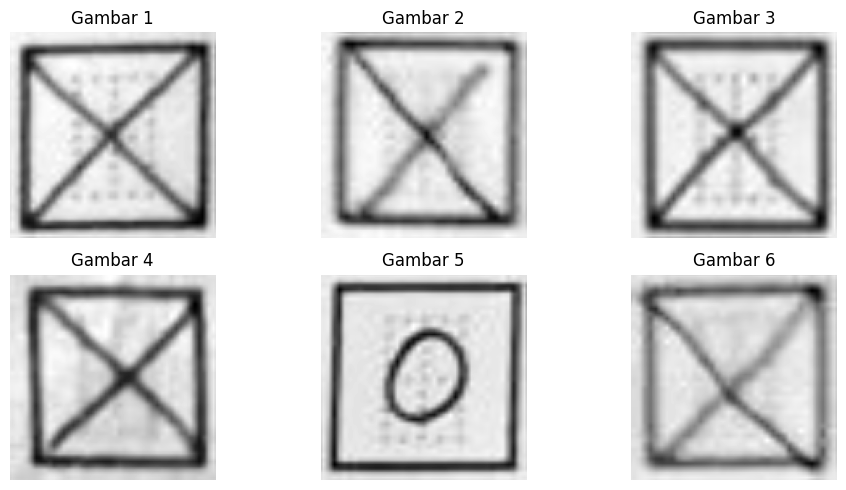

In [38]:
# Contoh 4 gambar pertama
sample_images = grayscale_images[:6]  # Ambil 4 gambar pertama

# Tampilkan gambar
plt.figure(figsize=(10, 5))

for i, image in enumerate(sample_images):
    plt.subplot(2, 3, i + 1)
    plt.title('GAMBAR GRAYSCALE')
    plt.imshow(image, cmap='gray')  # Tampilkan gambar dengan cmap 'gray' untuk grayscale
    plt.axis('off')  # Nonaktifkan sumbu
    plt.title(f'Gambar {i + 1}')

plt.tight_layout()
plt.show()

# 3 Extraksi Feature

In [39]:
from skimage.feature import hog

# Ekstraksi fitur HOG
def extract_hog_features(images):
    hog_features = []
    for image in images:
        features = hog(image, orientations=8, pixels_per_cell=(16, 16),
                       cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)
        hog_features.append(features)
    return np.array(hog_features)

hog_features = extract_hog_features(grayscale_images)

# 4 Inisialisasi Model



In [40]:

from sklearn.metrics import accuracy_score
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# Model SVM
svm_model = SVC(kernel='linear', C=0.2)
svm_model.fit(X_train, y_train)

# Evaluasi model
accuracy = svm_model.score(X_test, y_test)
print(f"Accuracy Model SVM: {accuracy:.2f}")



# 5 Menyimpan Model

In [42]:
# Path ke folder di Google Drive
save_path = '/content/drive/MyDrive/Pengenalan Pola/svm_model.pkl'

# Simpan model ke Google Drive
joblib.dump(svm_model, save_path)

print(f"Model berhasil disimpan di {save_path}")

Model berhasil disimpan di /content/drive/MyDrive/Pengenalan Pola/svm_model.pkl


# 5 Melakukan Pengujian Model SVM


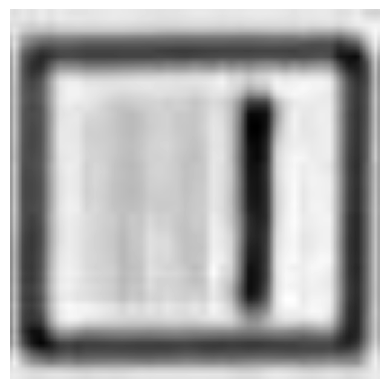

Prediksi untuk data baru:
[1]


In [44]:
# Ambil gambar pertama dari grayscale_images
if len(grayscale_images) > 0:
    new_image_data = grayscale_images[2000]
    plt.imshow(new_image_data, cmap='gray')
    plt.axis('off')
    plt.show()
    # Ekstraksi fitur HOG dari gambar baru
    new_data = hog(new_image_data, orientations=8, pixels_per_cell=(16, 16),
                   cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)

    # Lakukan prediksi
    predictions = svm_model.predict([new_data])
    print("Prediksi untuk data baru:")
    print(predictions)
else:
    print("Daftar grayscale_images kosong, tidak ada data untuk diproses.")

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Konversi menjadi array NumPy
grayscale_images = np.array(grayscale_images)
labels = np.array(labels)

# Ubah ke bentuk 2D
grayscale_img = grayscale_images.reshape(grayscale_images.shape[0], -1)

# Validasi data
assert grayscale_img.shape[0] == labels.shape[0]

split = [0.2,0.3,0.4]

# EXPERIMEN AKURASI TANPA DAN DENGAN NORMALISASI

In [46]:
print("Hasil akurasi model dengan ekstraksi fitur tanpa normalisasi")
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size= i, random_state=42)
    # Model SVM
    svm_model_1 = SVC(kernel='linear', C=0.2)
    svm_model_1.fit(X_train, y_train)
    # Evaluasi model
    if i == 0.2:
      i = '80 : 20'
    elif i == 0.4:
      i = '60 : 40'
    elif i == 0.3:
      i = '70 : 30'
    accuracy = svm_model_1.score(X_test, y_test)


    print(f"Split data {i} Hasil Akurasi {accuracy:.2f} ")


Hasil akurasi model dengan ekstraksi fitur tanpa normalisasi
Split data 80 : 20 Hasil Akurasi 0.99 
Split data 70 : 30 Hasil Akurasi 0.98 
Split data 60 : 40 Hasil Akurasi 0.98 


In [49]:
print("Hasil akurasi model dengan ekstraksi fitur dan normalisasi")
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size= i, random_state=42)
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    # Model SVM
    svm_model_2 = SVC(kernel='linear', C=0.2)
    svm_model_2.fit(X_train_normalized, y_train)
    # Evaluasi model
    if i == 0.2:
      i = '80 : 20'
    elif i == 0.4:
      i = '60 : 40'
    elif i == 0.3:
      i = '70 : 30'
    accuracy = svm_model_2.score(X_test_normalized, y_test)
    print(f"Split data {i} Hasil Akurasi {accuracy:.2f} ")


Hasil akurasi model dengan ekstraksi fitur dan normalisasi
Split data 80 : 20 Hasil Akurasi 0.98 
Split data 70 : 30 Hasil Akurasi 0.98 
Split data 60 : 40 Hasil Akurasi 0.98 


# EXPERIMEN TANPA  EXTRAKSI FEATURE

In [50]:

print("Hasil akurasi model dengan normalisasi dan tanpa ekstraksi fitur:")
for i in split:
    # Validasi test_size
    if not (0 < i < 1):
        raise ValueError(f"Invalid test_size value: {i}")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(grayscale_img, labels, test_size=i, random_state=42)

    # Normalisasi data
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # Model SVM
    svm_model_3 = SVC(kernel='linear', C=0.2)
    svm_model_3.fit(X_train_normalized, y_train)

    # Evaluasi model
    y_pred = svm_model_3.predict(X_test_normalized)
    accuracy = accuracy_score(y_test, y_pred)

    # Print hasil
    split_label = f"{int((1 - i) * 100)} : {int(i * 100)}"
    print(f"Split data {split_label} Hasil Akurasi {accuracy:.2f}")


Hasil akurasi model dengan normalisasi dan tanpa ekstraksi fitur:
Split data 80 : 20 Hasil Akurasi 0.93
Split data 70 : 30 Hasil Akurasi 0.92
Split data 60 : 40 Hasil Akurasi 0.91


In [51]:
print("Hasil akurasi model tanpa extraksi feature dan normalisasi")
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(grayscale_img, labels, test_size=i, random_state=42)
    # Pelatihan SVM dengan kernel linear
    svm_model_4 = SVC(kernel='linear', C=0.2)
    svm_model_4.fit(X_train, y_train)
    # Evaluasi model
    y_pred = svm_model_4.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # print(f"Akurasi model SVM: {accuracy:.4f}")
    if i == 0.2:
      i = '80 : 20'
    elif i == 0.4:
      i = '60 : 40'
    elif i == 0.3:
      i = '70 : 30'
    # accuracy = svm_model.score(X_test, y_test)

    print(f"Split data {i} Hasil Akurasi {accuracy:.2f} ")

Hasil akurasi model tanpa extraksi feature dan normalisasi
Split data 80 : 20 Hasil Akurasi 0.94 
Split data 70 : 30 Hasil Akurasi 0.92 
Split data 60 : 40 Hasil Akurasi 0.92 
